Installing the requirements.

In [ ]:
!pip install numpy==1.19.3
!pip install mediapipe
!pip install opencv-python
!pip install matplotlib
!pip install natsorted
!pip install pandas
!pip install plotly
!pip install seaborn

Setting up automatic reload for the scripts that will be written outside the jupyter notebook.

In [ ]:
%load_ext autoreload
%autoreload 2

Importing all dependencies.

In [30]:
from base64 import b64encode
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from natsort import natsorted
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import HTML, display
import ipywidgets as widgets
from typing import List # I don't think I need this!

# Custom imports
from pose_tracking_utils import *

Setting up all the necessary variables.

In [41]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

VIDEO_PATH = "./videos/clip_training_session.mp4"

Now we create the pose tracking video to visualize the joints and connections.

In [42]:
# For webcam input:
output_path = create_pose_tracking_video(VIDEO_PATH)
print(output_path)

Ignoring empty camera frame.
Pose video created!
clip_training_session_pose.mp4


Compress the video and visualize it on jupyter notebook.

In [43]:
compressed_path = save_compressed_video(output_path)
# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Create the landmark 3D plot animation.

In [44]:
create_landmarks_plot3D_animation(VIDEO_PATH, "clip_pose_training.mp4")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 1000) to (1008, 1008) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Ignoring empty camera frame.


In [45]:
compressed_path = save_compressed_video("clip_pose_training.mp4")
# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

The pose landmarks are this:

Another list of pose landmarks in world coordinates. Each landmark consists of the following:

x, y and z: Real-world 3D coordinates in meters with the origin at the center between hips.
visibility: Identical to that defined in the corresponding

[source](https://google.github.io/mediapipe/solutions/pose.html)

Create the reference plot against which we will set objectives to improve
the desired movements. Like for example I am using olympiam judokas
as my reference to improve my uchimata movement.

(*This function and the interactive widget are not finished*)

In [47]:
pose_coords = get_pose_coords(video_path=VIDEO_PATH)
# remove all nones from a list
pose_coords = [x for x in pose_coords if x is not None]
print("Length of the list with the pose coordinates: ",len(pose_coords))

Ignoring empty camera frame.
Pose video created!
Length of the list with the pose coordinates:  360


Now let's plot the x,y,z coordinates separately in time: 

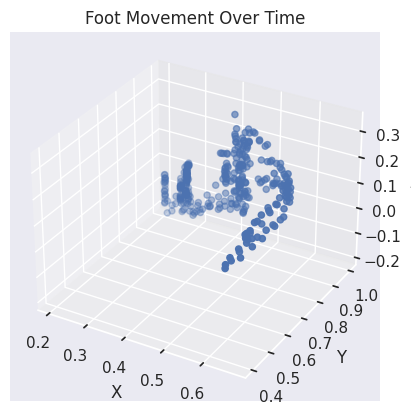

In [51]:
right_foot_coords = [pose_coords[i].landmark[31] for i in range(len(pose_coords))]
# Extract x, y, z coordinates from right and right foot
x_coords = [coord.x for coord in right_foot_coords]
y_coords = [coord.y for coord in right_foot_coords]
z_coords = [coord.z for coord in right_foot_coords]


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Foot Movement Over Time')
ax.scatter(x_coords, y_coords, z_coords);

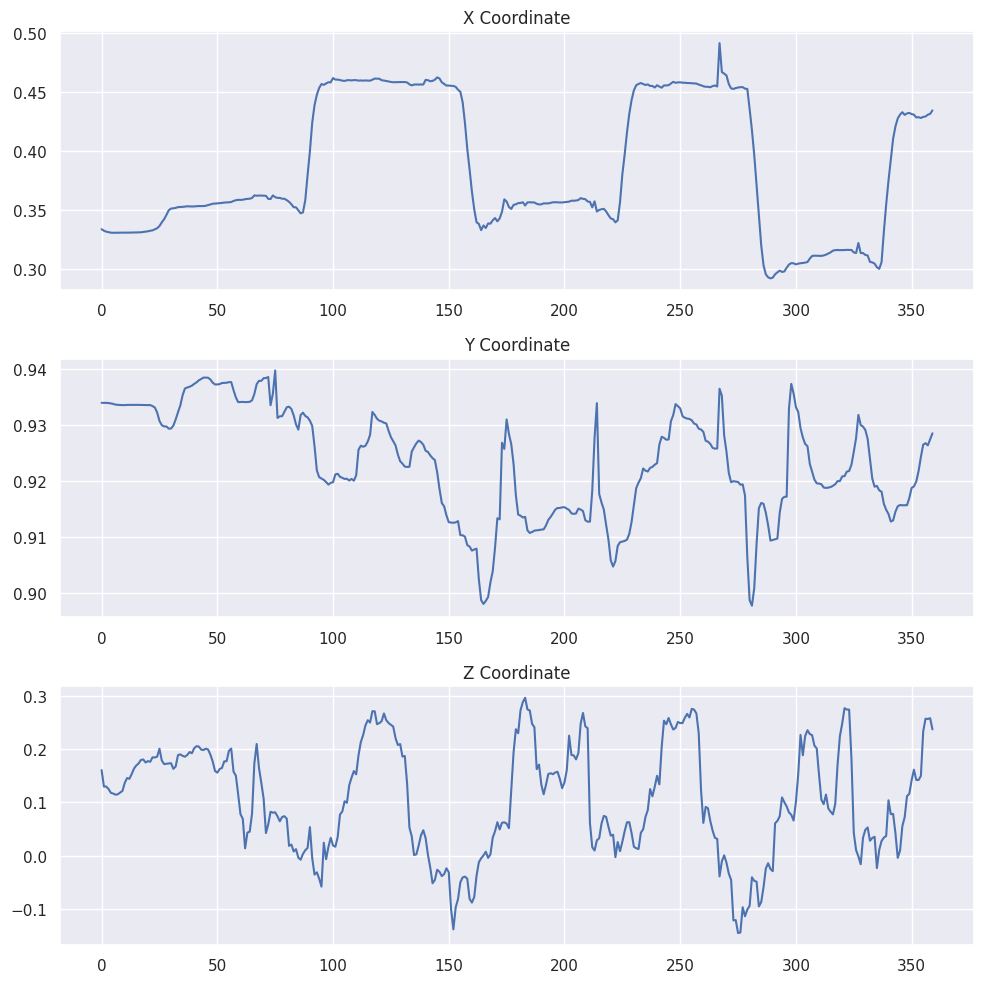

In [49]:
# Create 3 separate plots showing each coordinates in time
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].plot(x_coords)
axs[0].set_title('X Coordinate')
axs[1].plot(y_coords)
axs[1].set_title('Y Coordinate')
axs[2].plot(z_coords)
axs[2].set_title('Z Coordinate')
plt.tight_layout();

In [ ]:
def create_reference_plot(reference_coords: List, body_part_index: int):
    """
    Creates a reference plot for the desired motion
    Args:
        reference_coords (list): List of landmark objects with the x,y,z 
        coordinates.
        body_part_index (integer): index of the desired body part to plot.
    """
    body_part_coords = [reference_coords[i].landmark[body_part_index] for i in range(len(reference_coords))]
    
    # rest of the function code goes here


left_foot_coords = create_reference_plot(pose_coords, 31)
right_foot_coords = create_reference_plot(pose_coords, 32)

# Extract x, y, z coordinates from left and right foot
x_coords = [coord.x for coord in left_foot_coords]
y_coords = [coord.y for coord in left_foot_coords]
z_coords = [coord.z for coord in left_foot_coords]

x_coords_right = [coord.x for coord in right_foot_coords]
y_coords_right = [coord.y for coord in right_foot_coords]
z_coords_right = [coord.z for coord in right_foot_coords]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Foot Movement Over Time')

def update(frame):
    ax.clear()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Foot Movement Over Time')
    ax.scatter(x_coords[:frame], y_coords[:frame], z_coords[:frame])
    ax.scatter(x_coords_right[:frame], y_coords_right[:frame], z_coords_right[:frame])

# Create a slider for selecting the frame
frame_slider = widgets.IntSlider(value=0, min=0, max=len(x_coords), step=1, description='Frame')

# Define a function that updates the plot when the slider is changed
def on_value_change(change):
    frame = change['new']
    update(frame)

# Attach the function to the slider
frame_slider.observe(on_value_change, names='value')

# Display the slider and the plot
display(widgets.VBox([frame_slider, fig.canvas]))

Here we create a 3D plot animation for body parts (in this case for the feet).

In [ ]:
x_coords = [coord.x for coord in left_foot_coords]
y_coords = [coord.y for coord in left_foot_coords]
z_coords = [coord.z for coord in left_foot_coords]

x_coords_right = [coord.x for coord in right_foot_coords]
y_coords_right = [coord.y for coord in right_foot_coords]
z_coords_right = [coord.z for coord in right_foot_coords]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Foot Movement Over Time')

def update(frame):
    ax.clear()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Foot Movement Over Time')
    ax.scatter(x_coords[:frame], y_coords[:frame], z_coords[:frame])
    ax.scatter(x_coords_right[:frame], y_coords_right[:frame], z_coords_right[:frame])

ani = FuncAnimation(fig, update, frames=len(x_coords), interval=5)
ani.save('animation.mp4', writer='ffmpeg', fps=30)
#plt.show()

Nicer looking landdmark plot of specific moments of the video, using plotly.

In [ ]:

plot_landmarks(pose_coords[200].pose_landmarks,  mp_pose.POSE_CONNECTIONS)